In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:

# Import data files
questions = pd.read_csv('../data/ai.stackexchange.com_questions.csv')
answers = pd.read_csv('../data/ai.stackexchange.com_answers.csv')

save_dir = "../figures/"
name = "ai.stackexchange.com"
save_dir = os.path.join(save_dir, name)

if not os.path.exists(save_dir):
    os.mkdir(save_dir)
    print("Directory " , save_dir ,  " Created ") 
# save_dir = os.path.join(save_dir, name)

## Preparing the data

Read in the question and answer files.


In [3]:
def get_answer_length(row):
    a = row['Body']
    return len(a.split())

answers.dropna(subset=['Body'], inplace=True)
answers['AnswerLength'] = answers.apply(get_answer_length, axis=1)

def get_title_length(row):
    a = row['Title']
    return len(a.split())

questions['TitleLength'] = questions.apply(get_title_length, axis=1)

## Question Analysis
Count types of question in the dataset <br>
**WH-Question**: What, Who, Whom, Whose, Which, When, Where, Why, How <br>
**Aux-Question**: Do, Does, Did, Have, Has, Had, Is, Are, Was, Were

In [4]:
# WH-Question
wh_list = [
    'what', 
    'who', 
    'which', 
    'whom', 
    'where', 
    'when', 
    'whose', 
    'why', 
    'how'
]

# Do, Be, Has
aux_list = [
    'do',
    'does',
    'did',
    'have',
    'has',
    'had',
    'is',
    'are',
    'was',
    'were'
]

def count_question(titles):
    
    ''' Count each type of questions '''
    
    wh_count = 0
    aux_count = 0
    for title in titles:
        is_wh = False
        token = title.split()[0]

        if token in wh_list: 
            wh_count += 1
        elif token in aux_list:
            aux_count += 1
    return wh_count, aux_count

In [5]:
titles = questions['Title']
wh_count, aux_count = count_question(titles)
total = len(titles)
normal = total - wh_count - aux_count

print ("WH-Question: {}".format(wh_count))
print ("AUX-Question: {}".format(aux_count))
print ("Total : {}".format(len(titles)))

WH-Question: 1474
AUX-Question: 473
Total : 3784


### Visualize the data into pie chart

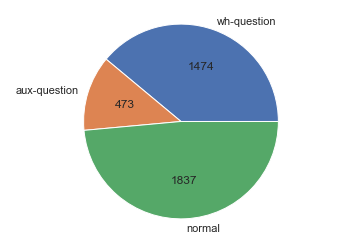

In [6]:
import seaborn as sns

sns.set(style="darkgrid")
fig1, ax1 = plt.subplots()

def absolute_value(val):
    a  = int(np.round(val/100.*total, 0))
    return a

sns.set()
sns.set_palette("Blues")

ax1.pie(
    [ wh_count, aux_count, normal], 
    labels=['wh-question', 'aux-question', 'normal'],
    autopct=absolute_value
)
ax1.axis('equal')
plt.show()
fig1.savefig(os.path.join(save_dir, 'question_type_chart.png'), dpi=300)

## Answer Analysis
- Basic analysis for the length of the answer
- Basic analysis with outlier removed
- Outlier is when the value exceeds 1.5 IQR from Q3
- Analysys the score of the answer

Understanding the answer's score before removing the outlier

Number of Answer at Score: 
Score 0: 1772
Score 1: 1556
Score 2: 949
Score 3: 544
Score 4: 264
Score 5: 141
Score 6: 105
Score 7: 60
Score 8: 31
Score 9: 30
Score 10: 31
Score 11: 14
Score 12: 12


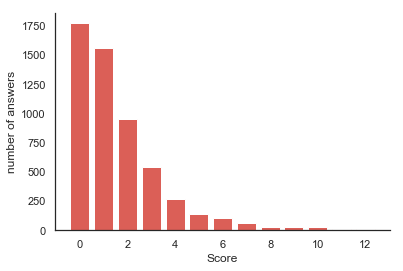

In [7]:
# Check how many answers per each score
num_answers = []
for i in range(13):
    a_score = answers['Score'] == i
    num = a_score.sum()
    num_answers.append(num)

sns.set()
sns.set_style("white")
sns.set_palette("hls")
fig, ax = plt.subplots()
ax.bar(range(len(num_answers)), num_answers)
sns.despine()
ax.set_xlabel('Score')
ax.set_ylabel('number of answers')
plt.savefig(os.path.join(save_dir, 'hist_score.png'), dpi=300)

print ("Number of Answer at Score: ")
for i, v in enumerate(num_answers):
    print ("Score {}: {}".format(i, v))

In [8]:
def get_arr_info(arr, column):
    
    """ Get info with graph about a column of DF """
    
    # Describe overview of data
    print ("Overview (num tokens):")
    print ("=========")
    print (arr.describe())
    
    # Box plot of the data
    sns.set()
    sns.set_style("whitegrid")
    sns.set_palette("BuGn_r", 1)
    plt.figure(figsize=(10,5))
    
    ax1= plt.subplot(1,2,1)
    sns.boxplot(None, arr)
    ax1.set_title(column + " length (all)")
    ax1.set_ylabel('number of tokens')
    
    ax2= plt.subplot(1,2,2)
    sns.boxplot(None, arr, showfliers=False)
    ax2.set_title(column + " length w/o upper outliers")
    ax2.set_ylabel('number of tokens')
    
    plt.suptitle(column + ' length')
    plt.savefig(os.path.join(save_dir, 'boxplot_answer_length.png'), dpi=300)
    plt.show() 
    
    # Display Distrubtion of the data
    
    num_bins = 20
    
    sns.set()
    sns.set_style("white")
    sns.set_palette("hls")
    plt.figure(figsize=(15,5))
    
    ax4 = plt.subplot(1,2,1)
    ax4.hist(arr, bins=num_bins, alpha=1)
    sns.despine()
    ax4.set_xlabel("num of tokens")
    ax4.set_ylabel("num of " + column)
    
    Q1 = arr.quantile(.25)
    Q2 = arr.quantile(.5)
    Q3 = arr.quantile(.75)
    
    IQR = Q3 - Q1
    max_len = Q3 + IQR * 1.5
    
    ax5 = plt.subplot(1,2,2)
    ax5.hist(arr, bins=num_bins, range=(0, max_len), alpha=1)
    sns.despine()
    ax5.set_xlabel("num of tokens")
    ax5.set_ylabel("num of " + column)
    
    plt.suptitle("Distribution of Answer\'s token")
    plt.savefig(os.path.join(save_dir, 'dist_answer_token.png'), dpi=300)
    plt.show()
    

### Answer Analysis

Answer Length Analysis

Overview (num tokens):
count    5760.000000
mean      241.445139
std       276.350828
min         1.000000
25%        77.000000
50%       161.000000
75%       304.000000
max      3529.000000
Name: AnswerLength, dtype: float64


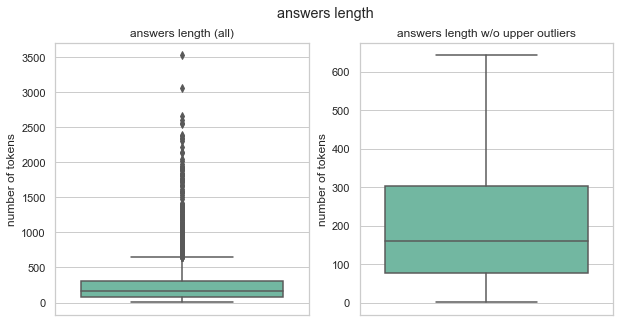

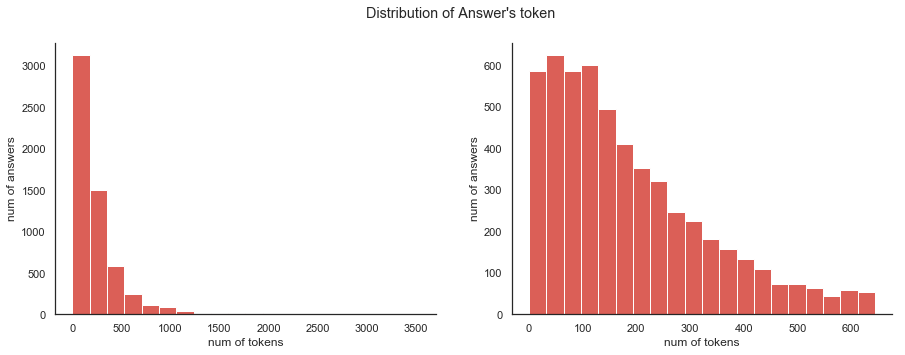

In [9]:
print ("Answer Length Analysis")
print ("======================\n")
get_arr_info(answers.AnswerLength, 'answers')

### Title Analysis

Title Length Analysis

Overview (num tokens):
count    3784.000000
mean       10.846723
std         4.625982
min         2.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        33.000000
Name: TitleLength, dtype: float64


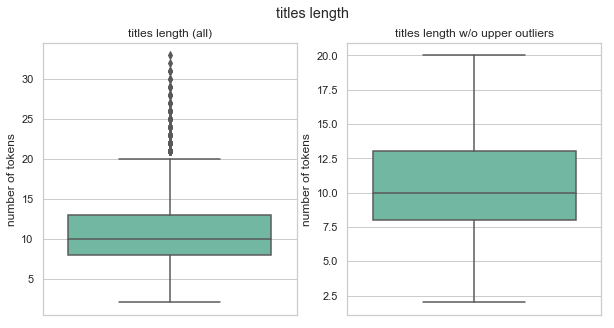

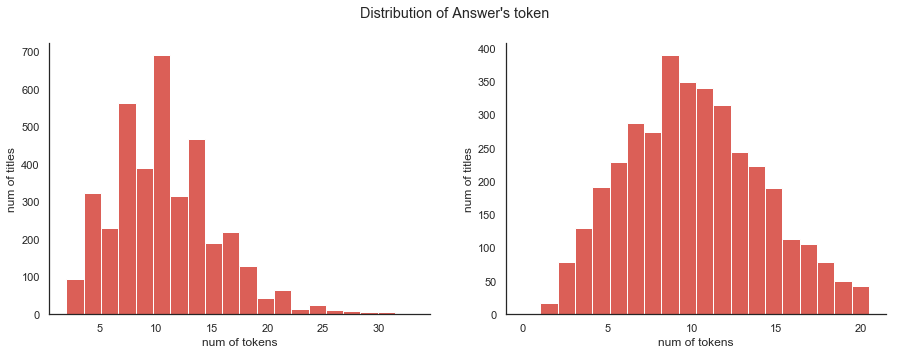

In [10]:
print ("Title Length Analysis")
print ("======================\n")
get_arr_info(questions.TitleLength, 'titles')

## Analysis of Tags
Analyze the tag used in the question when people are posting problem

In [11]:
tags_dict = {}
for tags in questions['Tags']:
    for t in tags.split():
        if t not in tags_dict:
            tags_dict[t] = 0
        tags_dict[t] += 1

In [12]:
tags = sorted(tags_dict.items(), key=lambda x: x[1], reverse=True)

In [13]:
!pip install wordcloud

Vendor:  continuum
Product: anaconda
Message: trial mode expires in 27 days
/anaconda2/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/anaconda2/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.h

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1200, height=700, max_font_size=100, max_words=100, background_color="white")
wordcloud = wordcloud.generate_from_frequencies(tags_dict)

# Display the generated image:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('./wordcloud.png', dpi=600)
plt.show()



ImportError: No module named wordcloud

## Vocabulary Size

In [30]:
vocab = {}

# Get token from questions title
for titles in questions['Title']:
    for token in titles.split():
        if token not in vocab:
            vocab[token] = 0
        vocab[token] += 1
        
print ("num of vocabs in question: {}".format(len(vocab)))

# Get token from questions title
for body in answers['Body']:
    for token in body.split():
        if token not in vocab:
            vocab[token] = 0
        vocab[token] += 1
        
print ("num of vocabs: {}".format(len(vocab)))
        

num of vocabs in question: 4829
num of vocabs: 33588


In [44]:
vocab_arr = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

In [49]:
vocab_arr[:40]

[('the', 66569),
 (',', 56616),
 ('.', 52358),
 ('of', 35832),
 ('to', 35011),
 ('a', 33334),
 ('is', 27760),
 ('and', 24656),
 ('in', 22548),
 ('that', 18054),
 ('it', 13690),
 (')', 13541),
 ('you', 13020),
 ('for', 12394),
 ('-', 11943),
 ('be', 11761),
 ('(', 11199),
 ('"', 10782),
 ('are', 10485),
 ('this', 9531),
 ('can', 8970),
 ('as', 8521),
 ('with', 8087),
 ('not', 7947),
 ('or', 7314),
 ('on', 6943),
 ('an', 6588),
 ('i', 6351),
 ('if', 6089),
 ('have', 5847),
 (':', 5684),
 ('$', 5677),
 ('but', 5352),
 ('learning', 5332),
 ('which', 5148),
 ('by', 5022),
 ('from', 4946),
 ('we', 4937),
 ('ai', 4897),
 ('?', 4682)]

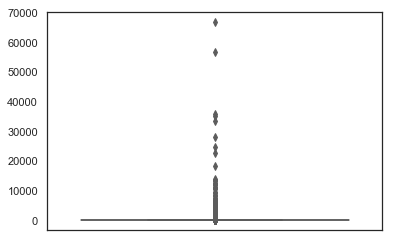

In [63]:
sns.boxplot(None, vocab.values()[1000:])

In [70]:
words = sorted(vocab.values(), reverse=True)

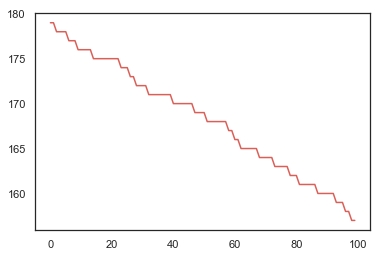

In [92]:

plt.plot(words[900:1000])

In [98]:
df_words = pd.DataFrame(words)
df_words.describe()

,0
count,33588.000000
mean,42.627367
std,754.352766
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,66569.000000


In [116]:
(df_words < 43).sum()

0    30931
dtype: int64

In [117]:
(df_words < 10).sum()

0    27051
dtype: int64

In [100]:
(df_words >= 43).sum()

0    2657
dtype: int64

In [104]:
df_words[df_words < 43][40:60]

,0
40,NaN
41,NaN
42,NaN
43,NaN
44,NaN
45,NaN
46,NaN
47,NaN
48,NaN
49,NaN


In [124]:
(df_words < 1000).sum()

0    33422
dtype: int64

In [110]:
vocab_arr[-500:]

[('v_d$', 1),
 ('spiritualizing', 1),
 ('goalscorer', 1),
 ('koncel', 1),
 ('softmax(s_t)$', 1),
 ('storable', 1),
 ('argument(s', 1),
 ('vertebrae', 1),
 ('laughable', 1),
 ('forcefully', 1),
 ('branded', 1),
 ('aglimpse', 1),
 ('primate', 1),
 ('dissolvere', 1),
 ('0.625$.', 1),
 ('protons', 1),
 ('railwaystation', 1),
 ('berkely', 1),
 ('machine(instead', 1),
 ('protects', 1),
 ('functionalists', 1),
 ('5.1', 1),
 ('5.2', 1),
 ('5.3', 1),
 ('musics', 1),
 ('5.8', 1),
 ('y=-1', 1),
 ('gulcehre', 1),
 ('\\end{array', 1),
 ('td(\xce\xbb', 1),
 ('1_p$', 1),
 ('preexisted', 1),
 ('nonchalantly', 1),
 ('departure', 1),
 ('trevor', 1),
 ('callback', 1),
 ('bosomed', 1),
 ('1701.02620', 1),
 ('\\gamma^2', 1),
 ('magnanimity', 1),
 ('w_2(w_1x+b_1)+b_2', 1),
 ('recompiles', 1),
 ('a)\\right]$$', 1),
 ('eluded', 1),
 ('2*pi', 1),
 ('blast', 1),
 ('conformist', 1),
 ('body.and', 1),
 ('inhibits', 1),
 ('residing', 1),
 ('w(she)$$', 1),
 ('computerscience', 1),
 ('horswill', 1),
 ('undertake', 1

In [113]:
vocab_arr[50:100]

[('at', 3487),
 ('so', 3468),
 ('data', 3404),
 ("n't", 3343),
 ('network', 3239),
 ('use', 3080),
 ('how', 3032),
 ('like', 2913),
 ('neural', 2912),
 ('they', 2890),
 ('=', 2851),
 ('all', 2807),
 ('has', 2787),
 ('other', 2672),
 ('function', 2626),
 ('then', 2550),
 ('model', 2458),
 ('also', 2452),
 ('intelligence', 2442),
 ('may', 2403),
 ('problem', 2367),
 ("'", 2297),
 ('time', 2248),
 ('about', 2235),
 ('using', 2230),
 ('could', 2224),
 ('human', 2207),
 ('training', 2206),
 ('only', 2156),
 ('when', 2097),
 ('such', 2097),
 ('these', 2077),
 ('than', 2069),
 ('any', 2023),
 ('/', 2014),
 ('state', 1977),
 ('used', 1936),
 ('example', 1922),
 ('does', 1921),
 ('because', 1920),
 ('no', 1916),
 (';', 1887),
 ('algorithm', 1882),
 ('networks', 1863),
 ('machine', 1855),
 ('just', 1823),
 ('where', 1807),
 ('based', 1800),
 ('each', 1783),
 ('system', 1775)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cf8c650>]], dtype=object)

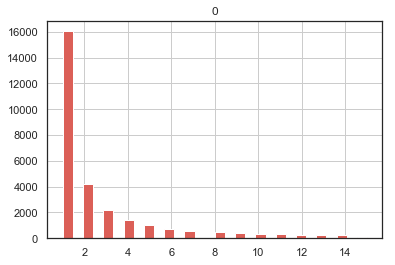

In [129]:
df_words[5000:].hist(bins=30)

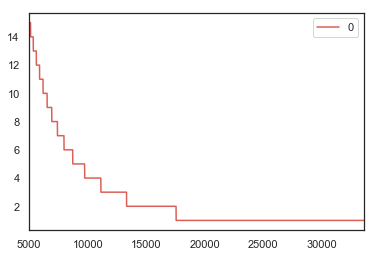

In [136]:
df_words[5000:].plot()

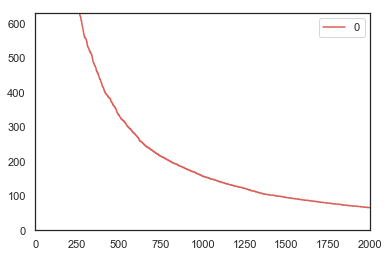

In [146]:
avg = df_words[:2000].mean().values[0]
df_words[:2000].plot(kind='line', ylim=(0,avg))

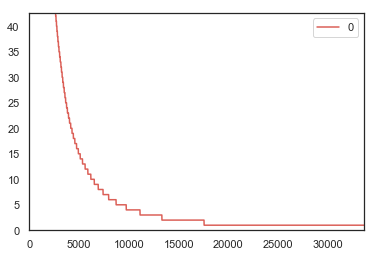

In [147]:
avg = df_words.mean().values[0]
df_words.plot(kind='line', ylim=(0,avg))

In [151]:
sorted(df_words.values())

TypeError: 'numpy.ndarray' object is not callable

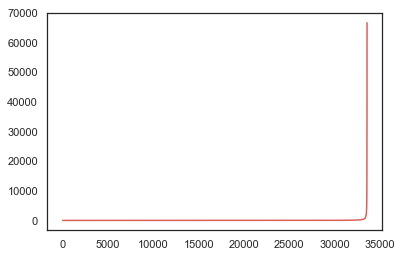

In [155]:
plt.plot(sorted(df_words.values))